In this workbook, we are aggregating our models to see if they work better together

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, f1_score

import joblib

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/My Drive/Project_3/'

Mounted at /content/drive


In [ ]:
knn_female = joblib.load(drive_dir + 'models/knn_female.joblib')

In [ ]:
knn_male = joblib.load(drive_dir + 'models/knn_male.joblib')

In [ ]:
logr_female = joblib.load(drive_dir + 'models/logr_female_model.joblib')

In [ ]:
logr_male = joblib.load(drive_dir + 'models/logr_male_model.joblib')

In [ ]:
xgb_female = joblib.load(drive_dir + 'models/female_over_xgb.joblib')

In [ ]:
xgb_male = joblib.load(drive_dir + 'models/male_over_xgb.joblib')

In [ ]:
female_X_test = pd.read_csv(drive_dir + 'data/female_X_test.csv')

In [ ]:
female_y_test = pd.read_csv(drive_dir + 'data/female_y_test.csv')

In [ ]:
male_X_test = pd.read_csv(drive_dir + 'data/male_X_test.csv')

In [ ]:
male_y_test = pd.read_csv(drive_dir + 'data/male_y_test.csv')

#Creating X and y test suited for models

In [ ]:
female_X_test = female_X_test.drop('Unnamed: 0', axis = 1)

In [ ]:
female_y_test = female_y_test.drop('Unnamed: 0', axis = 1)

In [ ]:
male_X_test = male_X_test.drop('Unnamed: 0', axis = 1)

In [ ]:
male_y_test = male_y_test.drop('Unnamed: 0', axis = 1)

In [ ]:
logr_female_X_test = female_X_test.drop(['previous_year_rating_norm', 'age_rating',
       'age_KPI'], axis = 1)

In [ ]:
logr_male_X_test = male_X_test.drop(['previous_year_rating_norm', 'age_rating',
       'age_KPI'], axis = 1)

In [ ]:
knn_female_X_test = pd.read_csv(drive_dir + 'data/le_female_X_test.csv')

In [ ]:
knn_female_y_test = pd.read_csv(drive_dir + 'data/le_female_y_test.csv')

In [ ]:
knn_female_X_test = knn_female_X_test.drop('Unnamed: 0', axis = 1)

In [ ]:
knn_female_y_test = knn_female_y_test.drop('Unnamed: 0', axis = 1)

In [ ]:
knn_male_X_test = male_X_test[['department', 'awards_won?', 'avg_training_score']]

#Female 
- Comparing models to determine weighting
- Creating aggregate model

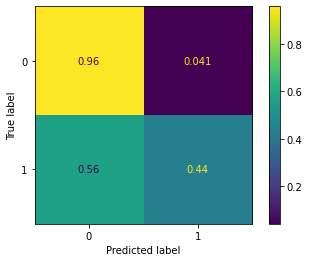

In [ ]:
plot_confusion_matrix(xgb_female,female_X_test,female_y_test, normalize = 'true')
plt.savefig(drive_dir + 'images/confusion_matrix_xgb_female.jpg')

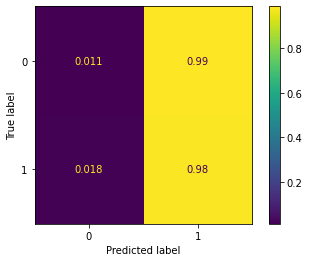

In [ ]:
#only predicting 1, so weight is going to be small
plot_confusion_matrix(logr_female,logr_female_X_test,female_y_test, normalize = 'true')
plt.savefig(drive_dir + 'images/confusion_matrix_logr_female.jpg')

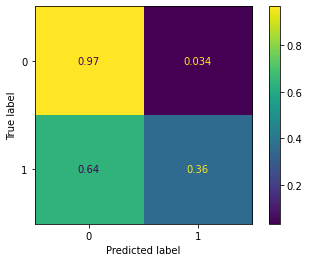

In [ ]:
plot_confusion_matrix(knn_female,knn_female_X_test,knn_female_y_test, normalize = 'true')
plt.savefig(drive_dir + 'images/confusion_matrix_knn_female.jpg')

In [ ]:
agg_model_female_pred = female_y_test.copy()

In [ ]:
agg_model_female_pred['xgb_pred'] = xgb_female.predict(female_X_test)

In [ ]:
agg_model_female_pred['logr_pred'] = logr_female.predict(logr_female_X_test)

In [ ]:
agg_model_female_pred['knn_pred'] = knn_female.predict(knn_female_X_test)

In [ ]:
def agg_model_acc(xgb_weight, logr_weight, pred_df):

  pred_df['weighted_pred'] = (xgb_weight*pred_df['xgb_pred']+logr_weight*pred_df['logr_pred'] + (1-xgb_weight-logr_weight)*pred_df['knn_pred'])
  pred_df['final_pred'] = round(pred_df['weighted_pred']).astype(int)

  accuracy = (pred_df['is_promoted'] == pred_df['final_pred']).sum()/pred_df.shape[0]
  return accuracy

In [ ]:
xw = .35
lw = .1
agg_model_female_pred['weighted_pred'] = (xw*agg_model_female_pred['xgb_pred']+lw*agg_model_female_pred['logr_pred'] + (1-xw-lw)*agg_model_female_pred['knn_pred'])


In [ ]:
agg_model_female_pred['final_pred'] = round(agg_model_female_pred['weighted_pred']).astype(int)

In [ ]:
xgb_weight = np.linspace(0,1,100)
logr_weight = np.linspace(0,1,100)
best_acc = 0
weights = [0,0]
for xgb_w in xgb_weight:
  for lr_w in logr_weight:
    acc = agg_model_acc(xgb_w,lr_w,agg_model_female_pred)
    if acc > best_acc:
      best_acc = acc
      weights = [xgb_w,lr_w]
print(best_acc, weights)

0.9119329791581529 [0.0, 0.0]


In [ ]:
(agg_model_female_pred['is_promoted'] == agg_model_female_pred['final_pred']).sum()/agg_model_female_pred.shape[0]

0.1040049039640376

In [ ]:
accuracy_score(female_y_test,xgb_female.predict(female_X_test))

0.911728647323253

#Male 
- Comparing models to determine weighting
- Creating aggregate model

In [ ]:
xgb_female_preds = xgb_female.predict(female_X_test)

In [ ]:
accuracy_score(female_y_test,xgb_female_preds)

0.911728647323253

In [ ]:
1-female_y_test['is_promoted'].sum()/female_y_test.shape[0]

0.9100939926440539

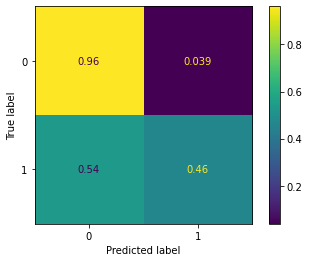

In [ ]:
print(plot_confusion_matrix(xgb_male,male_X_test,male_y_test, normalize = 'true'))
plt.savefig(drive_dir + 'images/confusion_matrix_xbg_male.jpg')

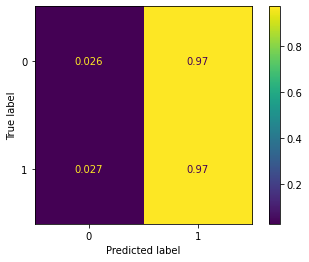

In [ ]:
print(plot_confusion_matrix(logr_male,logr_male_X_test,male_y_test, normalize = 'true'))
plt.savefig(drive_dir + 'images/confusion_matrix_logr_male.jpg')

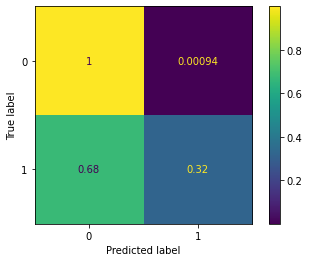

In [ ]:
print(plot_confusion_matrix(knn_male,knn_male_X_test,male_y_test, normalize = 'true'))
plt.savefig(drive_dir + 'images/confusion_matrix_knn_male.jpg')

In [ ]:
agg_model_male_pred = male_y_test.copy()

In [ ]:
agg_model_male_pred['xgb_pred'] = xgb_male.predict(male_X_test)

In [ ]:
agg_model_male_pred['logr_pred'] = logr_male.predict(logr_male_X_test)

In [ ]:
agg_model_male_pred['knn_pred'] = knn_male.predict(knn_male_X_test)

In [ ]:
xgb_weight = np.linspace(0,1,100)
logr_weight = np.linspace(0,1,100)
best_acc = 0
weights = [0,0]
for xgb_w in xgb_weight:
  for lr_w in logr_weight:
    acc = agg_model_acc(xgb_w,lr_w,agg_model_male_pred)
    if acc > best_acc:
      best_acc = acc
      weights = [xgb_w,lr_w]
print(best_acc, weights)

0.9429387825785782 [0.0, 0.0]


#XGB Where this model misses

In [ ]:
xgb_female_miss_df = female_X_test.copy()

In [ ]:
xgb_female_miss_df['is_promoted'] = female_y_test

In [ ]:
xgb_female_miss_df['preds'] = xgb_female.predict(female_X_test)

In [ ]:
xgb_male_miss_df = male_X_test.copy()

In [ ]:
xgb_male_miss_df['is_promoted'] = male_y_test

In [ ]:
xgb_male_miss_df['preds'] = xgb_male.predict(male_X_test)

In [ ]:
def percent_wrong(df,col,num):
  check_df = df[df[col] == num]
  wrong = check_df[check_df['is_promoted'] != check_df['preds']].shape[0]
  total = check_df.shape[0]
  pct_wrong = 100*wrong/total

  return pct_wrong
  #print(f'{col} {num} is predicted wrong {pct_wrong}% of the time')

In [ ]:
miss_col = ['department', 'region', 'education', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met>80%', 'awards_won?', 'avg_training_score', 'starting_age',
       'total_training_score', 'previous_year_rating_norm', 'age_rating',
       'age_KPI']
def most_pct_wrong(df):
  for col in miss_col:
    most_wrong = 0
    most_wrong_num = 0
    for num in df[col].unique():
      wrong = percent_wrong(df,col, num)
      if wrong > most_wrong:
        most_wrong = wrong
        most_wrong_num = num
    print(f'{col} {num} is predicted wrong {most_wrong}% of the time')    
    print("="*150)

In [ ]:
most_pct_wrong(xgb_female_miss_df)

department 6 is predicted wrong 15.503875968992247% of the time
region 9 is predicted wrong 14.615384615384615% of the time
education 3 is predicted wrong 12.64367816091954% of the time
recruitment_channel 2 is predicted wrong 15.625% of the time
no_of_trainings 8 is predicted wrong 13.043478260869565% of the time
age 21 is predicted wrong 16.129032258064516% of the time
previous_year_rating 2.0 is predicted wrong 15.940685820203893% of the time
length_of_service 34 is predicted wrong 50.0% of the time
KPIs_met>80% 0 is predicted wrong 21.205597416576964% of the time
awards_won? 1 is predicted wrong 32.67326732673267% of the time
avg_training_score 98 is predicted wrong 20.0% of the time
starting_age 57 is predicted wrong 16.666666666666668% of the time
total_training_score 188 is predicted wrong 100.0% of the time
previous_year_rating_norm 0.4 is predicted wrong 15.940685820203893% of the time
age_rating 3 is predicted wrong 16.45422943221321% of the time
age_KPI 3 is predicted wrong 

In [ ]:
most_pct_wrong(xgb_male_miss_df)

department 6 is predicted wrong 15.018315018315018% of the time
region 9 is predicted wrong 16.286644951140065% of the time
education 1 is predicted wrong 12.582781456953642% of the time
recruitment_channel 1 is predicted wrong 9.30232558139535% of the time
no_of_trainings 7 is predicted wrong 14.285714285714286% of the time
age 20 is predicted wrong 17.391304347826086% of the time
previous_year_rating 0.0 is predicted wrong 15.780661364587694% of the time
length_of_service 26 is predicted wrong 33.333333333333336% of the time
KPIs_met>80% 1 is predicted wrong 20.515463917525775% of the time
awards_won? 1 is predicted wrong 24.63235294117647% of the time
avg_training_score 41 is predicted wrong 28.571428571428573% of the time
starting_age 58 is predicted wrong 25.0% of the time
total_training_score 468 is predicted wrong 100.0% of the time
previous_year_rating_norm 0.0 is predicted wrong 15.780661364587694% of the time
age_rating 6 is predicted wrong 50.0% of the time
age_KPI 1 is pred

In [ ]:
for col in miss_col:
  for num in xgb_male_miss_df[col].unique():
    wrong = percent_wrong(xgb_male_miss_df,col, num)
    print(f'{col} {num} is predicted wrong {wrong}% of the time')    
  print("="*150)

department 0 is predicted wrong 12.037659717552119% of the time
department 7 is predicted wrong 5.8995611896635785% of the time
department 4 is predicted wrong 7.324364723467863% of the time
department 8 is predicted wrong 11.55893536121673% of the time
department 1 is predicted wrong 6.653992395437262% of the time
department 5 is predicted wrong 7.68566493955095% of the time
department 3 is predicted wrong 6.015037593984962% of the time
department 2 is predicted wrong 6.746987951807229% of the time
department 6 is predicted wrong 15.018315018315018% of the time
region 31 is predicted wrong 10.1890756302521% of the time
region 24 is predicted wrong 5.502392344497608% of the time
region 11 is predicted wrong 6.247269550021843% of the time
region 25 is predicted wrong 3.225806451612903% of the time
region 28 is predicted wrong 10.54054054054054% of the time
region 6 is predicted wrong 6.656346749226006% of the time
region 7 is predicted wrong 5.9748427672955975% of the time
region 23 is 

In [ ]:
for col in miss_col:
  for num in xgb_female_miss_df[col].unique():
    wrong = percent_wrong(xgb_female_miss_df,col, num)
    print(f'{col} {num} is predicted wrong {wrong}% of the time')    
  print("="*150)

department 4 is predicted wrong 8.673469387755102% of the time
department 2 is predicted wrong 4.8076923076923075% of the time
department 8 is predicted wrong 12.252042007001167% of the time
department 5 is predicted wrong 9.21435499515034% of the time
department 7 is predicted wrong 6.469298245614035% of the time
department 1 is predicted wrong 6.167400881057269% of the time
department 3 is predicted wrong 5.882352941176471% of the time
department 0 is predicted wrong 15.503875968992247% of the time
department 6 is predicted wrong 15.0% of the time
region 11 is predicted wrong 8.81735479356193% of the time
region 14 is predicted wrong 11.275415896487985% of the time
region 16 is predicted wrong 0.0% of the time
region 10 is predicted wrong 7.317073170731708% of the time
region 18 is predicted wrong 8.187134502923977% of the time
region 1 is predicted wrong 9.090909090909092% of the time
region 31 is predicted wrong 8.75763747454175% of the time
region 24 is predicted wrong 7.482993197

In [ ]:
female_recall = [[440,192, 'promoted'],[4454,4270,'not promoted']]

In [ ]:
female_recall_df = pd.DataFrame(female_recall, columns = ['actual', 'predicted', 'is_promoted']) 

In [ ]:
female_precision = [[376,192, 'promoted'],[4518,4270,'not promoted']]

In [ ]:
female_precision_df = pd.DataFrame(female_precision, columns = ['predicted', 'actual', 'is_promoted']) 

In [ ]:
male_recall = [[960,443, 'promoted'],[10589,10177,'not promoted']]

In [ ]:
male_recall_df = pd.DataFrame(male_recall, columns = ['actual', 'predicted', 'is_promoted']) 

In [ ]:
male_precision = [[855,443, 'promoted'],[10694,10177,'not promoted']]

In [ ]:
male_precision_df = pd.DataFrame(male_precision, columns = ['predicted', 'actual', 'is_promoted']) 

In [ ]:
def precision_recall_bar(df,kind, xlim, first_x, second_x):
  sns.set_theme(style="whitegrid")

  # Initialize the matplotlib figure
  f, ax = plt.subplots(figsize=(20, 3))

  # Load the example car crash dataset
  #crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

  # Plot the total crashes
  sns.set_color_codes("pastel")
  sns.barplot(x=first_x, y="is_promoted", data=df,
              label=first_x.title(), color="b")

  # Plot the crashes where alcohol was involved
  sns.set_color_codes("muted")
  sns.barplot(x=second_x, y="is_promoted", data=df,
              label=second_x.title(), color="b")

  # Add a legend and informative axis label
  ax.legend(ncol=2, loc="upper right", frameon=True)
  ax.set(xlim=(0, xlim), ylabel="",
        xlabel="")
  ax.set_title(kind)
  sns.despine(left=True, bottom=True)

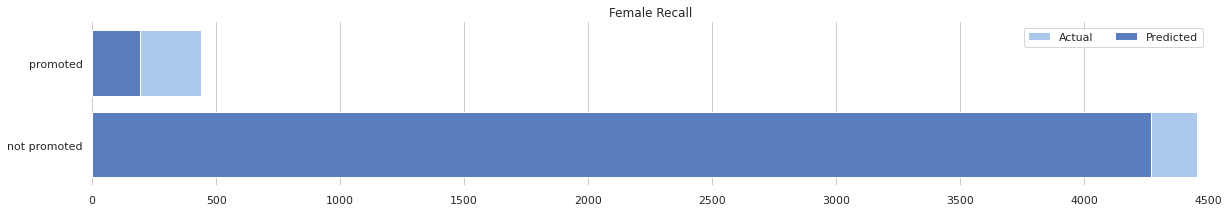

In [ ]:
precision_recall_bar(female_recall_df,'Female Recall', 4500, 'actual', 'predicted')
plt.savefig(drive_dir + 'images/female_recall.jpg')

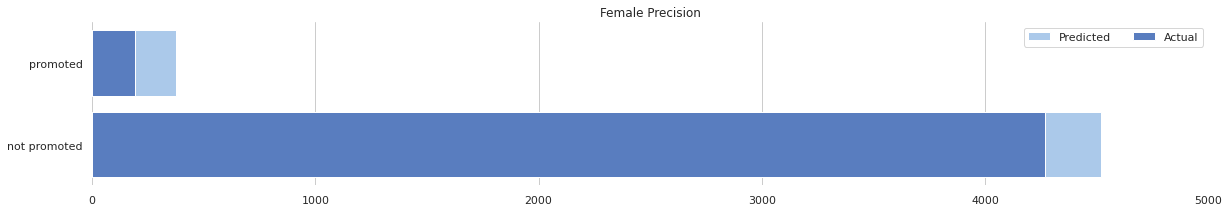

In [ ]:
precision_recall_bar(female_precision_df,'Female Precision', 5000, 'predicted', 'actual')
plt.savefig(drive_dir + 'images/female_precision.jpg')

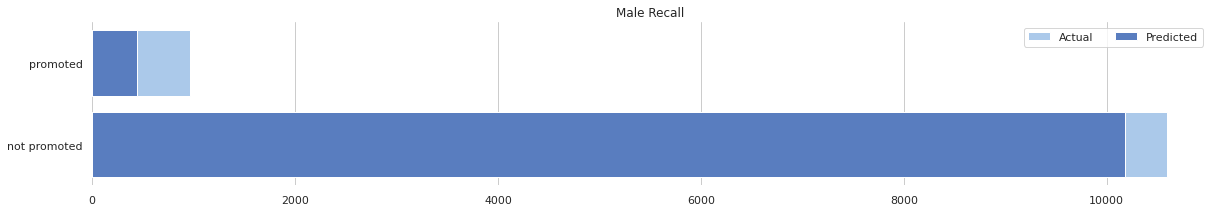

In [ ]:
precision_recall_bar(male_recall_df,'Male Recall', 11000, 'actual', 'predicted')
plt.savefig(drive_dir + 'images/male_recall.jpg')

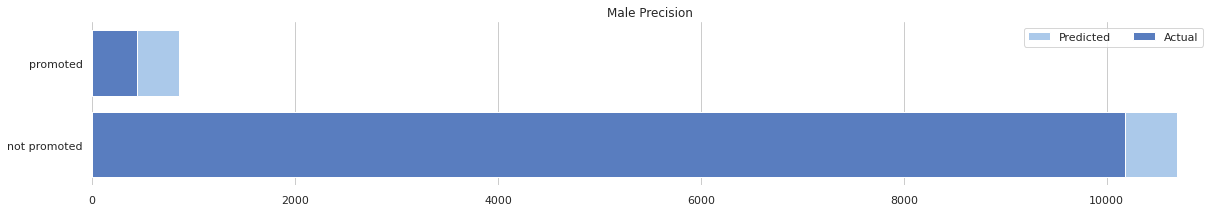

In [ ]:
precision_recall_bar(male_precision_df,'Male Precision', 11000, 'predicted', 'actual')
plt.savefig(drive_dir + 'images/male_precision.jpg')

#Predictions for Presentation

In [ ]:
saul = [[0,11,2,1,2,3,34,3,2,1,1,90,32,270,.8,74,7]]

In [ ]:
saul_df = pd.DataFrame(saul, columns = ['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met>80%', 'awards_won?', 'avg_training_score', 'starting_age',
       'total_training_score', 'previous_year_rating_norm', 'age_rating',
       'age_KPI']) 

In [ ]:
xgb_male.predict(saul_df)

array([1])

In [ ]:
paulina = [[1,3,0,0,1,6,35,1,5,0,0,45,30,270,.8,31,45]]

In [ ]:
paulina_df = pd.DataFrame(paulina, columns = ['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met>80%', 'awards_won?', 'avg_training_score', 'starting_age',
       'total_training_score', 'previous_year_rating_norm', 'age_rating',
       'age_KPI']) 

In [ ]:
xgb_female.predict(paulina_df)

array([0])

In [ ]:
def similar_perecnt(df,col,num,promoted):
  wrong_df = df[df['preds'] != df['is_promoted']]
  total = df[df[col] == num].shape[0]
  similar_df = wrong_df[wrong_df[col]==num]
  similar = similar_df[similar_df['preds'] == promoted].shape[0]
  pct = 100*similar/total
  return pct

##Saul

In [ ]:
similar_perecnt(xgb_male_miss_df,'department', 0, 1)

5.716207128446537

In [ ]:
similar_perecnt(xgb_male_miss_df,'education', 2, 1)

3.5808147174770038

In [ ]:
similar_perecnt(xgb_male_miss_df,'recruitment_channel', 2, 1)

3.826685563879328

In [ ]:
similar_perecnt(xgb_male_miss_df,'no_of_trainings', 3, 1)

2.112676056338028

In [ ]:
similar_perecnt(xgb_male_miss_df,'age', 34, 1)

3.1545741324921135

In [ ]:
similar_perecnt(xgb_male_miss_df,'previous_year_rating', 3, 1)

3.4907081868407834

In [ ]:
similar_perecnt(xgb_male_miss_df,'length_of_service', 2, 1)

5.298457411133468

In [ ]:
similar_perecnt(xgb_male_miss_df,'KPIs_met>80%', 1, 1)

9.149484536082474

In [ ]:
similar_perecnt(xgb_male_miss_df,'awards_won?', 1, 1)

15.441176470588236

In [ ]:
similar_perecnt(xgb_male_miss_df,'avg_training_score', 90, 1)

0.0

##Paulina

In [ ]:
similar_perecnt(xgb_male_miss_df,'department', 1, 0)

3.9923954372623576

In [ ]:
similar_perecnt(xgb_male_miss_df,'education', 3, 0)

1.697792869269949

In [ ]:
similar_perecnt(xgb_male_miss_df,'recruitment_channel', 1, 0)

5.813953488372093

In [ ]:
similar_perecnt(xgb_male_miss_df,'no_of_trainings', 6, 0)

7.142857142857143

In [ ]:
similar_perecnt(xgb_male_miss_df,'age', 35, 0)

5.565529622980251

In [ ]:
similar_perecnt(xgb_male_miss_df,'previous_year_rating', 1, 0)

0.5886681383370125

In [ ]:
similar_perecnt(xgb_male_miss_df,'length_of_service', 5, 0)

4.472573839662447

In [ ]:
similar_perecnt(xgb_male_miss_df,'KPIs_met>80%', 0, 0)

0.99100273829704

In [ ]:
similar_perecnt(xgb_male_miss_df,'awards_won?', 0, 0)

4.362862463421123

In [ ]:
similar_perecnt(xgb_male_miss_df,'avg_training_score', 45, 0)

5.161290322580645